# Random forest MLA

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os

# Load the data
student_file = os.path.join("..", "data", "processed", "Merged_Final_File_Updated.xlsx")
df = pd.read_excel(student_file)

# Encode the target variable
df['dropped out'] = df['dropped out'].map({'no': 0, 'yes': 1})

# Select features and target
features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade']
target = 'dropped out'

X = df[features]
y = df[target]

# Define a pipeline with scaling and Random Forest Classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('rf', RandomForestClassifier(n_estimators=60, random_state=42))  # Random Forest Classifier
])

# Define Stratified K-Fold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate using cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")

# Split data into training and testing sets for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model on the training set
pipeline.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nFinal Test Set Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Cross-Validation Accuracy Scores: [0.65671642 0.68656716 0.68656716 0.66666667 0.74242424]
Mean Accuracy: 0.69
Standard Deviation: 0.03

Final Test Set Accuracy: 0.66

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.56      0.63        36
           1       0.60      0.77      0.68        31

    accuracy                           0.66        67
   macro avg       0.67      0.66      0.66        67
weighted avg       0.68      0.66      0.65        67


Confusion Matrix:
[[20 16]
 [ 7 24]]


# Previous education

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os

# Load the data
student_file = os.path.join("..", "data", "processed", "Merged_Final_File_Updated.xlsx")
df = pd.read_excel(student_file)

# Map dependent variable 'dropped out' to binary
df['dropped out'] = df['dropped out'].map({'no': 0, 'yes': 1})

# Define features and target
features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade', 'education_level']
target = 'dropped out'

X = df[features]
y = df[target]

# Define preprocessing for numerical and categorical features
numerical_features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade']
categorical_features = ['education_level']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=1)),  # Fill NA values with 1
    ('scaler', StandardScaler())
])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the pipeline with Random Forest Classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=60, random_state=42))
])

# Define Stratified K-Fold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get predictions
y_pred_cv = cross_val_predict(pipeline, X, y, cv=cv)

# Evaluate cross-validation predictions
print("Cross-Validation Metrics:")
print(classification_report(y, y_pred_cv))

# Confusion matrix for cross-validation
conf_matrix_cv = confusion_matrix(y, y_pred_cv)
print("\nConfusion Matrix (Cross-Validation):")
print(conf_matrix_cv)

result = cross_val_score(pipeline, X, y, cv=cv)
print(f'Cross-Validation Results (Accuracy): {result}')
print(f'Mean Accuracy: {result.mean()}')

# Calculate cross-validation accuracy
cv_accuracy = accuracy_score(y, y_pred_cv)
print(f"\nCross-Validation Accuracy: {cv_accuracy:.2f}")



Cross-Validation Metrics:
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       178
           1       0.69      0.75      0.72       155

    accuracy                           0.73       333
   macro avg       0.73      0.73      0.73       333
weighted avg       0.73      0.73      0.73       333


Confusion Matrix (Cross-Validation):
[[126  52]
 [ 39 116]]
Cross-Validation Results (Accuracy): [0.73134328 0.71641791 0.70149254 0.74242424 0.74242424]
Mean Accuracy: 0.7268204432383536

Cross-Validation Accuracy: 0.73


# AUC - ROC

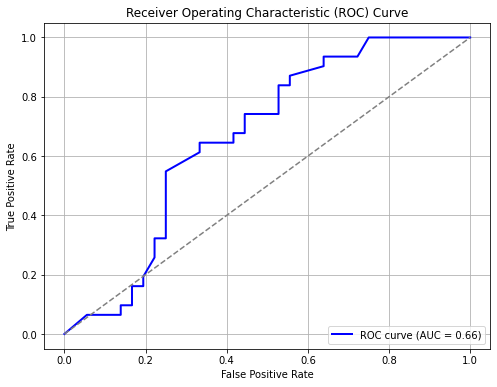

AUC: 0.66


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score
import os
import matplotlib.pyplot as plt

# Load the data
student_file = os.path.join("..", "data", "processed", "Merged_Final_File_Updated.xlsx")
df = pd.read_excel(student_file)

# Map dependent variable 'dropped out' to binary
df['dropped out'] = df['dropped out'].map({'no': 0, 'yes': 1})

# Define features and target
features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade', 'education_level']
target = 'dropped out'

X = df[features]
y = df[target]

# Define preprocessing for numerical and categorical features
numerical_features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade']
categorical_features = ['education_level']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=1)),  # Fill NA values with 1
    ('scaler', StandardScaler())
])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the pipeline with Random Forest Classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=60, random_state=42))
])

# Split data into training and testing sets for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model on the training set
pipeline.fit(X_train, y_train)

# Predict probabilities for the test set (probabilities for the positive class, i.e., class 1)
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})', color='blue', linewidth=2)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no skill)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC value
print(f"AUC: {auc:.2f}")


C:\Users\JiaQiang\AppData\Local\Temp/ipykernel_10784/3444405755.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['education_level'] = df_selected['education_level'].astype('category').cat.codes
C:\Users\JiaQiang\AppData\Local\Temp/ipykernel_10784/3444405755.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['dropped out'] = df_selected['dropped out'].map({'yes': 1, 'no': 0})


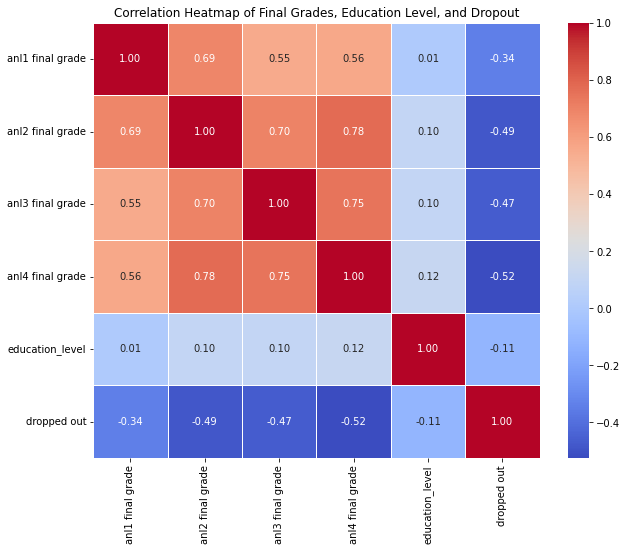

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the file path
student_file = os.path.join("..", "data", "processed", "Merged_Final_File_Updated.xlsx")

# Load the data from the Excel file
df = pd.read_excel(student_file)

# Select the relevant columns (assumes columns are named exactly as stated)
columns_of_interest = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade', 'education_level', 'dropped out']

# Ensure that these columns exist in the dataset
df_selected = df[columns_of_interest]

# Handle non-numeric data: 'education_level' and 'dropout' may need to be encoded
df_selected['education_level'] = df_selected['education_level'].astype('category').cat.codes

# Encode 'dropout' (assuming 'Yes' and 'No' as possible values)
df_selected['dropped out'] = df_selected['dropped out'].map({'yes': 1, 'no': 0})

# Compute the correlation matrix for the selected columns
correlation_matrix = df_selected.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Final Grades, Education Level, and Dropout")
plt.show()


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

# Load the data
student_file = os.path.join("..", "data", "processed", "Merged_Final_File_Updated.xlsx")
df = pd.read_excel(student_file)

# Map dependent variable 'dropped out' to binary
df['dropped out'] = df['dropped out'].map({'no': 0, 'yes': 1})

# Define features and target
features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade', 'education_level']
target = 'dropped out'

X = df[features]
y = df[target]

# Define preprocessing for numerical and categorical features
numerical_features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade']
categorical_features = ['education_level']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=1)),  # Fill NA values with 1
    ('scaler', StandardScaler())
])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the pipeline with Random Forest Classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=60, random_state=42))
])

# Define Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List of metrics to evaluate
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Evaluate each metric using cross-validation
results = {}
for metric in metrics:
    if metric == 'roc_auc':
        # For ROC AUC, use 'predict_proba' method
        scores = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc')
    else:
        # For other metrics, use standard class predictions
        scores = cross_val_score(pipeline, X, y, cv=cv, scoring=metric)
        
    results[metric] = {
        'mean': scores.mean(),
        'std': scores.std(),
        'scores': scores
    }   

# Print results
print("\nCross-Validation Metrics (Random Forest Classifier):")
for metric, values in results.items():
    print(f"\n{metric.capitalize()} Scores for each fold: {values['scores']}")
    print(f"Mean {metric.capitalize()}: {values['mean']:.4f}")
    print(f"Standard Deviation of {metric.capitalize()}: {values['std']:.4f}")



Cross-Validation Metrics (Random Forest Classifier):

Accuracy Scores for each fold: [0.73134328 0.71641791 0.70149254 0.74242424 0.74242424]
Mean Accuracy: 0.7268
Standard Deviation of Accuracy: 0.0159

Precision Scores for each fold: [0.66666667 0.67647059 0.65714286 0.73333333 0.73333333]
Mean Precision: 0.6934
Standard Deviation of Precision: 0.0332

Recall Scores for each fold: [0.83870968 0.74193548 0.74193548 0.70967742 0.70967742]
Mean Recall: 0.7484
Standard Deviation of Recall: 0.0474

F1 Scores for each fold: [0.74285714 0.70769231 0.6969697  0.72131148 0.72131148]
Mean F1: 0.7180
Standard Deviation of F1: 0.0154

Roc_auc Scores for each fold: [0.76971326 0.72401434 0.76299283 0.81474654 0.80414747]
Mean Roc_auc: 0.7751
Standard Deviation of Roc_auc: 0.0323


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

# Load the data
student_file = os.path.join("..", "data", "processed", "Merged_Final_File_Updated.xlsx")
df = pd.read_excel(student_file)

# Map dependent variable 'dropped out' to binary
df['dropped out'] = df['dropped out'].map({'no': 0, 'yes': 1})

# Define features and target
features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade', 'education_level']
target = 'dropped out'

X = df[features]
y = df[target]

# Define preprocessing for numerical and categorical features
numerical_features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade']
categorical_features = ['education_level']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=1)),  # Fill NA values with 1
    ('scaler', StandardScaler())
])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the pipeline with Random Forest Classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List of metrics to evaluate
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'classifier__min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'classifier__max_features': ['sqrt', 'log2']  # Number of features to consider for the best split
}

grid_search = GridSearchCV(
    estimator=pipeline,            # Pipeline defined earlier
    param_grid=param_grid,         # Parameter grid
    scoring='roc_auc',             # Scoring metric
    cv=cv,                         # Stratified K-Fold
    n_jobs=-1,                     # Use all available cores
    verbose=2                      # Show progress logs
)

# Fit the grid search to find the best parameters
grid_search.fit(X, y)

# Print the best parameters and best score
print("\nBest Hyperparameters from GridSearchCV:")
print(grid_search.best_params_)
print(f"Best ROC AUC Score: {grid_search.best_score_:.4f}")

# Re-run cross-validation with the best model
best_pipeline = grid_search.best_estimator_

# Results for the tuned model
tuned_results = {}
for metric in metrics:
    if metric == 'roc_auc':
        scores = cross_val_score(best_pipeline, X, y, cv=cv, scoring='roc_auc')
    else:
        scores = cross_val_score(best_pipeline, X, y, cv=cv, scoring=metric)
    
    tuned_results[metric] = {
        'mean': scores.mean(),
        'std': scores.std(),
        'scores': scores
    }

# Print the results for the tuned model
print("\nTuned Model Cross-Validation Metrics:")
for metric, values in tuned_results.items():
    print(f"\nTuned {metric.capitalize()} Scores for each fold: {values['scores']}")
    print(f"Tuned Mean {metric.capitalize()}: {values['mean']:.4f}")
    print(f"Tuned Standard Deviation of {metric.capitalize()}: {values['std']:.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best Hyperparameters from GridSearchCV:
{'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best ROC AUC Score: 0.7967

Tuned Model Cross-Validation Metrics:

Tuned Accuracy Scores for each fold: [0.74626866 0.68656716 0.73134328 0.78787879 0.77272727]
Tuned Mean Accuracy: 0.7450
Tuned Standard Deviation of Accuracy: 0.0352

Tuned Precision Scores for each fold: [0.675      0.63888889 0.67567568 0.72972973 0.73529412]
Tuned Mean Precision: 0.6909
Tuned Standard Deviation of Precision: 0.0365

Tuned Recall Scores for each fold: [0.87096774 0.74193548 0.80645161 0.87096774 0.80645161]
Tuned Mean Recall: 0.8194
Tuned Standard Deviation of Recall: 0.0483

Tuned F1 Scores for each fold: [0.76056338 0.68656716 0.73529412 0.79411765 0.76923077]
Tuned Mean F1: 0.7492
Tuned Standard Deviation of F1: 0.0365

Tuned Ro

# Feature importance

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


c:\Users\JiaQiang\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best Hyperparameters from GridSearchCV:
{'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best ROC AUC Score: 0.7967

Tuned Model Cross-Validation Metrics:

Tuned Accuracy Scores for each fold: [0.74626866 0.68656716 0.73134328 0.78787879 0.77272727]
Tuned Mean Accuracy: 0.7450
Tuned Standard Deviation of Accuracy: 0.0352

Tuned Precision Scores for each fold: [0.675      0.63888889 0.67567568 0.72972973 0.73529412]
Tuned Mean Precision: 0.6909
Tuned Standard Deviation of Precision: 0.0365

Tuned Recall Scores for each fold: [0.87096774 0.74193548 0.80645161 0.87096774 0.80645161]
Tuned Mean Recall: 0.8194
Tuned Standard Deviation of Recall: 0.0483

Tuned F1 Scores for each fold: [0.76056338 0.68656716 0.73529412 0.79411765 0.76923077]
Tuned Mean F1: 0.7492
Tuned Standard Deviation of F1: 0.0365

Tuned Roc_auc Scores for each fold: [0.76523297 0.72983871 0.80958781 0.

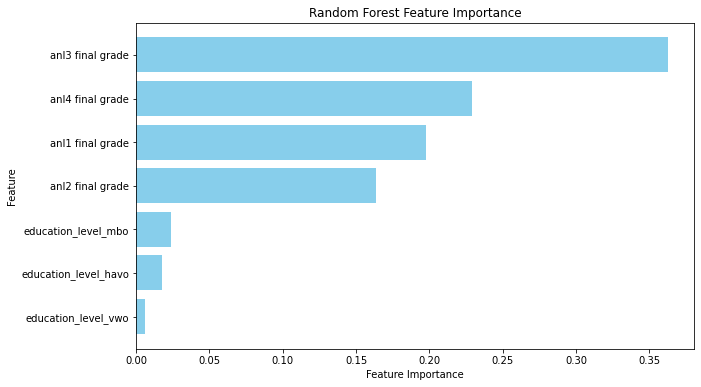

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import os

# Load the data
student_file = os.path.join("..", "data", "processed", "Merged_Final_File_Updated.xlsx")
df = pd.read_excel(student_file)

# Map dependent variable 'dropped out' to binary
df['dropped out'] = df['dropped out'].map({'no': 0, 'yes': 1})

# Define features and target
features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade', 'education_level']
target = 'dropped out'

X = df[features]
y = df[target]

# Define preprocessing for numerical and categorical features
numerical_features = ['anl1 final grade', 'anl2 final grade', 'anl3 final grade', 'anl4 final grade']
categorical_features = ['education_level']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=1)),  # Fill NA values with 1
    ('scaler', StandardScaler())
])
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the pipeline with Random Forest Classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# List of metrics to evaluate
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'classifier__min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'classifier__max_features': ['sqrt', 'log2']  # Number of features to consider for the best split
}

grid_search = GridSearchCV(
    estimator=pipeline,            # Pipeline defined earlier
    param_grid=param_grid,         # Parameter grid
    scoring='roc_auc',             # Scoring metric
    cv=cv,                         # Stratified K-Fold
    n_jobs=-1,                     # Use all available cores
    verbose=2                      # Show progress logs
)

# Fit the grid search to find the best parameters
grid_search.fit(X, y)

# Print the best parameters and best score
print("\nBest Hyperparameters from GridSearchCV:")
print(grid_search.best_params_)
print(f"Best ROC AUC Score: {grid_search.best_score_:.4f}")

# Re-run cross-validation with the best model
best_pipeline = grid_search.best_estimator_

# Results for the tuned model
tuned_results = {}
for metric in metrics:
    if metric == 'roc_auc':
        scores = cross_val_score(best_pipeline, X, y, cv=cv, scoring='roc_auc')
    else:
        scores = cross_val_score(best_pipeline, X, y, cv=cv, scoring=metric)
    
    tuned_results[metric] = {
        'mean': scores.mean(),
        'std': scores.std(),
        'scores': scores
    }

# Print the results for the tuned model
print("\nTuned Model Cross-Validation Metrics:")
for metric, values in tuned_results.items():
    print(f"\nTuned {metric.capitalize()} Scores for each fold: {values['scores']}")
    print(f"Tuned Mean {metric.capitalize()}: {values['mean']:.4f}")
    print(f"Tuned Standard Deviation of {metric.capitalize()}: {values['std']:.4f}")

# Plot the feature importance
best_rf_model = grid_search.best_estimator_.named_steps['classifier']

# Get feature importances
importances = best_rf_model.feature_importances_

# Get the feature names
feature_names = numerical_features + list(grid_search.best_estimator_.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Remove 'education_level_nan' feature from the DataFrame
feature_importance_df = feature_importance_df[feature_importance_df['Feature'] != 'education_level_nan']

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()
